<p align="center"><b><font size="6"> Macine Learning in practice</b></p>

# Data Processing

In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

In [ ]:
import os
import pandas as pd

# Parcourir tous les dossiers dans "Clean Data"
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.csv') or file.endswith('.tsv'):
                file_path = os.path.join(folder_path, file)

                var_name = file.replace('.csv', '').replace('.tsv', '')

                # Choisir le séparateur en fonction de l'extension
                sep = ',' if file.endswith('.csv') else '\t'

                try:
                    df = pd.read_csv(file_path, sep=sep)
                    globals()[var_name] = df
                    print(f"{var_name} chargé avec succès, shape = {df.shape}")
                except Exception as e:
                    print(f"Erreur lors du chargement de {file}: {e}")

test_dataset chargé avec succès, shape = (25000, 2)
train_dataset chargé avec succès, shape = (25000, 2)
unsupervised_dataset chargé avec succès, shape = (50000, 2)
attack_annotations chargé avec succès, shape = (1365217, 7)
attack_annotated_comments chargé avec succès, shape = (115864, 7)


In [ ]:
movie_sentiment_tmdb

,reviews,movie_id,usernames,ratings,binary_rating
0,FULL SPOILER-FREE REVIEW @ https://www.firstsh...,502356,msbreviews,8.0,Positive
1,This and Last of Us are two recent movies-from...,502356,rsanek,9.0,Positive
2,The Super Mario Bros. Movie is a fun ride thro...,502356,TitanGusang,7.0,Positive
3,SOOOOO FIRE I LOVEEEE MARIO PLEEASE MAKE ANOTH...,502356,holdenc,10.0,Positive
4,Guardians of the Galaxy Vol. 3 is the perfect...,447365,mooney240,9.0,Positive
...,...,...,...,...,...
850,"I enjoy watching this cops horror movie, bring...",887265,Bandung88,10.0,Positive
851,"Very funny Christmas Italian movies, I highly ...",879225,Bandung88,10.0,Positive
852,"""It’s rare that I ever call out a film for bre...",873431,ManInBlack,4.0,Negative
853,Typical martial arts comedy/drama. This falls ...,802113,terrapong,2.0,Negative


In [ ]:
binary_abuse_train

,id,text,label,split
0,219358463,Hypothesis or Hypotheses? Should not the intro...,False,train
1,282840660,::::: And I have already you that DreamGuy lie...,False,train
2,495340436,", and what I see as an abuseive, inappropriate...",False,train
3,41254656,`Image copyright problem with Image:Autofellat...,False,train
4,87072436,"` : You say 'Turks from Turkey, R. of Azerbaij...",False,train
...,...,...,...,...
69521,612388356,What the hell do you mean what was I doing her...,True,train
69522,589837015,"` Milligan's son, David, born 1789, died in Ja...",False,train
69523,129685066,Assume good faith on your part? You cleary did...,False,train
69524,211386328,"`::*Rockpocket, please don't lecture about hat...",True,train


In [ ]:
print(binary_abuse_balanced_dev_sample.columns)
print(binary_abuse_dev_sample)

Index(['id', 'text', 'label', 'split'], dtype='object')
Index(['Unnamed: 0', 'id', 'text', 'split', 'label'], dtype='object')


In [ ]:
len(binary_abuse_balanced_dev_sample)

2316

<pre>
binary_movie_sentiment correspond to IMDB movie review sentiment
movie_sentiment_tmdb are IMDB movie reviews published after October 2021, to be sure GPT models have not been train on it

binary_abuse Wikipedia labelled data according to whether they contain a personal attack or not
</pre>

# Naive Bayes

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score

def train_and_evaluate_nb(df_train, df_test,n=-1, text_col='text', label_col='label'):

    df_train = df_train.dropna(subset=[text_col])
    df_test = df_test.dropna(subset=[text_col])
    if n > 0:
        df_train = df_train.sample(n=n, random_state=42).reset_index(drop=True)
    # Extraction des textes et labels
    X_train_texts = df_train[text_col]
    y_train = df_train[label_col]

    X_test_texts = df_test[text_col]
    y_test = df_test[label_col]

    # Vectorisation du texte avec TF-IDF
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train_texts)
    X_test = vectorizer.transform(X_test_texts)

    # Entraînement du modèle Naive Bayes
    model_nb = MultinomialNB()
    model_nb.fit(X_train, y_train)

    # Prédictions et évaluation
    preds = model_nb.predict(X_test)
    #print("=== Évaluation du modèle ===")
    #print("Accuracy:", accuracy_score(y_test, preds))
    #print(classification_report(y_test, preds))

    f1_val = f1_score(y_test, preds, average='macro')

    return model_nb, f1_val,



In [ ]:
model_nb, f1_scor = train_and_evaluate_nb(binary_abuse_train, binary_abuse_test)

print("=== Score F1 ===")
print(f1_scor)

=== Score F1 ===
0.6036786795511146


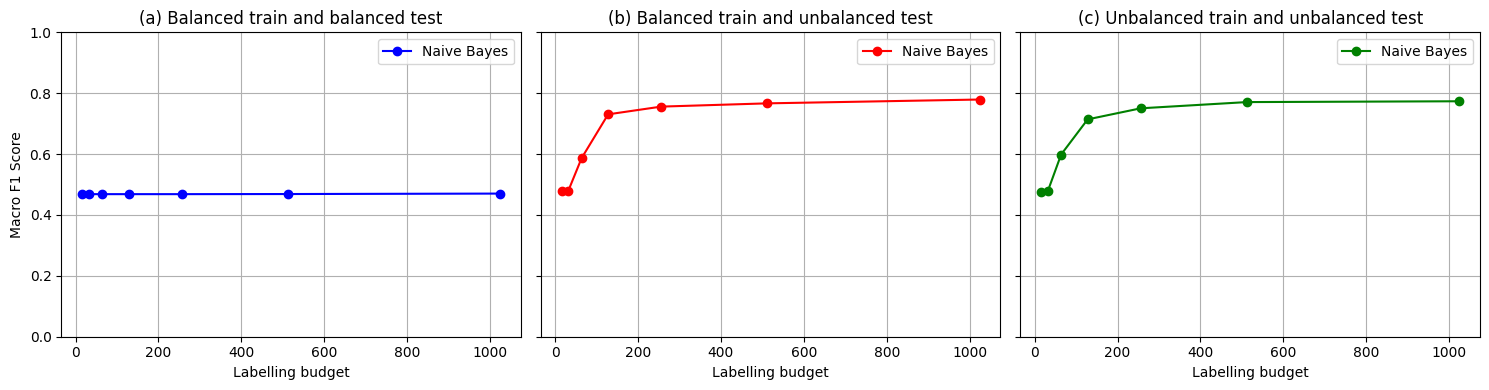

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labelling_budgets = [16, 32, 64, 128, 256, 512, 1024]
f1_score_Balanced = []
f1_score_UnBalanced = []
f1_score_HalfBalanced = []

for i in labelling_budgets :
    model_nb , f1_v  = train_and_evaluate_nb(binary_abuse_train, binary_abuse_test,i)
    f1_score_Balanced.append(f1_v)
    model_nb , f1_v  = train_and_evaluate_nb(binary_abuse_balanced_dev_sample, binary_abuse_unbalanced_dev_sample ,i)
    f1_score_HalfBalanced.append(f1_v)
    model_nb , f1_v  = train_and_evaluate_nb(binary_abuse_balanced_dev_sample, binary_abuse_test,i)
    f1_score_UnBalanced.append(f1_v)

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# (a) Balanced train and balanced test
axes[0].plot(labelling_budgets, f1_score_Balanced, marker='o', color='blue', label='Naive Bayes')
axes[0].set_title('(a) Balanced train and balanced test')
axes[0].set_xlabel('Labelling budget')
axes[0].set_ylabel('Macro F1 Score')
axes[0].set_ylim(0, 1.0)
axes[0].grid(True)
axes[0].legend()

# (b) Balanced train and unbalanced test
axes[1].plot(labelling_budgets, f1_score_HalfBalanced, marker='o', color='red', label='Naive Bayes')
axes[1].set_title('(b) Balanced train and unbalanced test')
axes[1].set_xlabel('Labelling budget')
axes[1].set_ylim(0, 1.0)
axes[1].grid(True)
axes[1].legend()

# (c) Unbalanced train and unbalanced test
axes[2].plot(labelling_budgets, f1_score_UnBalanced, marker='o', color='green', label='Naive Bayes')
axes[2].set_title('(c) Unbalanced train and unbalanced test')
axes[2].set_xlabel('Labelling budget')
axes[2].set_ylim(0, 1.0)
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

# Weak Supervision

In [ ]:
def run_weak_supervision_experiment(df_train, df_eval, n_train=-1,
                                      text_col='text', label_col='label',
                                      path_keywords="", path_annotations="",
                                      seed=42, tie_break_policy='random'):
    """
    Exécute la chaîne weak supervision (Snorkel) pour une tâche donnée.

    Paramètres:
      df_train         : DataFrame d'entraînement complet.
      df_eval          : DataFrame d'évaluation complet.
      n_train          : Labelling budget, c'est-à-dire le nombre d'exemples d'entraînement à utiliser.
                         Si n_train > 0, le DataFrame d'entraînement sera réduit par un échantillonnage aléatoire.
      text_col         : Nom de la colonne contenant le texte (par défaut 'text').
      label_col        : Nom de la colonne contenant le label (par défaut 'label').
      path_keywords    : Chemin vers le fichier CSV contenant les keywords.
      path_annotations : Chemin vers le fichier d’annotations (table séparée, par exemple).
      seed             : Graine aléatoire pour la reproductibilité.
      tie_break_policy : Politique de résolution des égalités lors de la prédiction (par exemple, 'random' ou 'abstain').

    Retourne:
      results        : Un dictionnaire contenant le Macro F1 score, le rapport de classification, etc.
      label_model    : Le LabelModel entraîné.

    Remarque:
      Le labelling budget (n_train) définit combien d'exemples annotés seront utilisés pour l'entraînement.
      En variant ce nombre, on peut observer comment la performance du modèle évolue avec davantage
      (ou moins) de données annotées.
    """
    # Convertir les DataFrames dans le format standard (doit produire au moins 'text' et 'label')
    df_train_conv, n_classes_train = convert_labels(df_train)
    df_eval_conv, n_classes_eval = convert_labels(df_eval)

    if n_classes_train != n_classes_eval:
        print("Erreur: le nombre de classes diffère entre train et eval!")
        return None, None

    # Appliquer le labelling budget si spécifié (n_train > 0)
    if n_train > 0:
        df_train_conv = df_train_conv.sample(n=n_train, random_state=seed).reset_index(drop=True)

    # Récupérer les labelling functions via get_lfs (pour binary_abuse dans cet exemple)
    lfs_dict = get_lfs(path_keywords, path_annotations)
    lf_list = [lf for key, lf in lfs_dict.items()]

    # Application des labelling functions sur le jeu d'entraînement
    from snorkel.labeling import PandasLFApplier
    applier = PandasLFApplier(lfs=lf_list)
    L_train = applier.apply(df=df_train_conv)

    # Entraîner le LabelModel
    from snorkel.labeling.model.label_model import LabelModel
    label_model = LabelModel(cardinality=n_classes_train, verbose=False)
    label_model.fit(L_train=L_train, n_epochs=100, log_freq=10, seed=seed)

    # Appliquer les labelling functions sur le jeu d'évaluation
    L_eval = applier.apply(df=df_eval_conv)
    Y_eval = df_eval_conv[label_col].values

    # Prédiction avec la politique de tie break
    preds = label_model.predict(L_eval, tie_break_policy=tie_break_policy)

    # Calcul des métriques d'évaluation
    from sklearn.metrics import f1_score, classification_report
    f1_val = f1_score(Y_eval, preds, average='macro', zero_division=0)
    report = classification_report(Y_eval, preds)

    results = {
        "f1_score": f1_val,
        "classification_report": report,
        "predictions": preds,
        "true_labels": Y_eval,
    }

    return results, label_model

# Exemple d'utilisation :
# Supposons que vos DataFrames 'binary_abuse_train' et 'binary_abuse_dev' sont déjà chargés dans le notebook.
# Remplacez path_keywords et path_annotations par les chemins correspondants.

results, label_model = run_weak_supervision_experiment(
    df_train=binary_abuse_train,
    df_eval=binary_abuse_dev,
    n_train=1024,  # Par exemple, utiliser 1024 exemples d'entraînement pour simuler le labelling budget.
    text_col='text',
    label_col='label',
    path_keywords="data/binary_abuse/misc/keywords.csv",
    path_annotations="data/binary_abuse/raw_data/annotations.csv",
    seed=42,
    tie_break_policy='random'
)

print("Macro F1 score (weak supervision):", results["f1_score"])
print("\nClassification Report:\n", results["classification_report"])

NameError: name 'convert_labels' is not defined

# Transfer Learning

# Prompt Engineering